## Probabilistic Programming 1: Introduction to Bayesian Machine Learning

#### Goal 
  - Familiarize yourself with basic concepts from Bayesian inference such as prior and posterior distributions.
  - Familiarize yourself with Jupyter notebooks and the basics of the Julia programming language.

#### Materials        
  - Mandatory
    - This notebook
  - Optional
    - [Course installation guide](https://biaslab.github.io/pdf/bmlip/INSTALL.pdf)
    - [Jupyter notebook tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
    - [Intro to programming in Julia](https://youtu.be/8h8rQyEpiZA?t=233).
    - [Differences between Julia and Matlab / Python](https://docs.julialang.org/en/v1/manual/noteworthy-differences/index.html).

<!-- ## Bayesian inference -->

In 1937, one of the founders of the field of statistics, [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), published a story of how he explained _inference_ to a friend. This story, called the "Lady Tasting Tea", has been re-told many times in different forms. In this notebook, we will re-tell one of its modern variants and introduce you to some important concepts along the way. Note that none of the material used below is new; you have all heard this in the theory lectures. The point of the Probabilistic Programming sessions is to solve practical problems so that concepts from theory become less abstract and you develop an intuition for them.

## Beer Tasting Experiment

In the summer of 2017, students of the University of Amsterdam participated in a "Beer Tasting Experiment" ([Doorn et al., 2019](https://journals.sagepub.com/doi/pdf/10.1177/1475725719848574)). Each participant was given two cups and were told that the cups contained [Hefeweissbier](https://www.bierenco.nl/product/weihenstephaner-hefeweissbier/), one with alcohol and one without. The participants had to taste each beer and guess which of the two contained alcohol. <!-- They also had to indicate their level of certainty, expressed as a number between 1 and 100 (higher = more certain). -->

We are going to do a statistical analysis of the tasting experiment. We want to know to what degree participants are able to discriminate between the alcoholic and alcohol-free beers. The participants make a choice between two cups. We can model this choice with what's known as a [_Bernoulli_ distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution). The Bernoulli distribution is a formula to compute the probability of a binary event. In this case, the event variable $X$ indicates either a "correct" choice of cup, which we will assign the number $1$, or an "incorrect" choice of cup, which we will assign the number $0$. The Bernoulli distribution has a "rate parameter" $\theta$, a number between $0$ and $1$, which governs the probability of the two events. If $\theta = 1$, then the participant will always choose the right cup ("always" = "with probability $1$") and if $\theta = 0$, then the participant will never choose the right cup ("never" = "with probability $0$"). Choosing at random, i.e. getting as many correct choices as incorrect choices, corresponds to $\theta = 0.5$.

Bayesian inference is about 3 core steps: specifying a prior distribution, specifying a likelihood and computing a posterior distribution. We are going to walk through these three steps in detail below.

## 1. Prior distributions

In Bayesian inference, it is important to think about what kind of _prior knowledge_ you have about your problem. In our tasting experiment, this corresponds to what you think the probability is that a participant will correctly choose the cup. In other words, you have some thoughts about what value $\theta$ is in this scenario. You might think that the participants' choices are all going to be roughly random. Or, given that you have tasted other types of alcohol-free beers before, you might think that the participants are going to choose the right cup most of the time. This intuition, this "prior knowledge", needs to be quantified. We do that by specifying another probability distribution for it, in this case the [_Beta_ distribution](https://en.wikipedia.org/wiki/Beta_distribution). We use a Beta distribution to describe our state of knowledge about appropriate values for $\theta$. 

The Beta distribution computes the probability of an outcome in the interval $[0,1]$. Like any other other distribution, it has parameters: $\alpha$ and $\beta$. Both are "shape parameters", meaning the distribution has a different shape for each value of the parameters. Let's visualise this!

In [1]:
using Distributions
using Plots

In Julia, you import libraries and software packages using the `using` command. Here we have imported a library of probability distributions called [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) and a library of plotting utilities called [Plots.jl](https://github.com/JuliaPlots/Plots.jl).

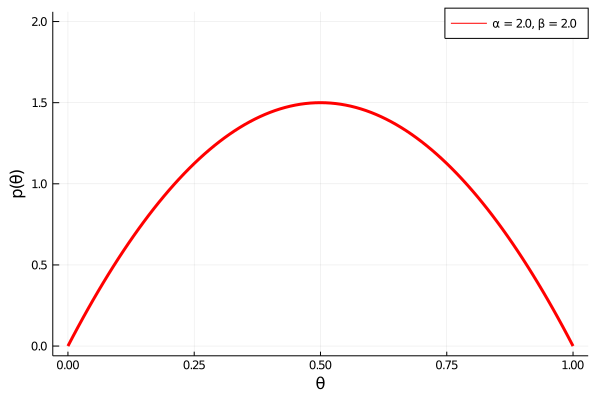

In [2]:
# Define shape parameters
α = 2.0
β = 2.0

# Define probability distribution
pθ = Beta(α, β)

# Visualize probability distribution function
θ = range(0.0, step=0.01, stop=1.0)
plot(θ, pdf.(pθ, θ), linewidth=3, color="red", label="α = "*string(α)*", β = "*string(β), xlabel="θ", ylabel="p(θ)", ylims=[0.0, 2.0])

A couple of things to note about the code block: 
- You can use greek letters as variables (write them like in latex, e.g. \alpha, and press `tab`)
- Ranges of numbers work just like they do in Matlab (e.g. `0.0:0.1:1.0`) and Python (e.g. `range(0.0, stop=100., length=100)`). Note that Julia is strict about types, e.g. using integers vs floats.
- There is a `.` after the command `pdf`. This refers to ["broadcasting"](https://julia.guide/broadcasting): the function is applied to each element of a list or array. Here we use the `pdf` command to compute the probability for each value of $\theta$ in the array.
- Many of the keyword arguments in the `plot` command should be familiar to you if you've worked with [Matplotlib](https://matplotlib.org/) (Python's plotting library).
- In the `label=` argument to plots, we have performed "string concatenation". In Julia, you write a string with double-quote characters and concatenate two strings by "multiplying", i.e. using `*`.

I encourage you to play around with the shape parameters and see how they alter the distribution.

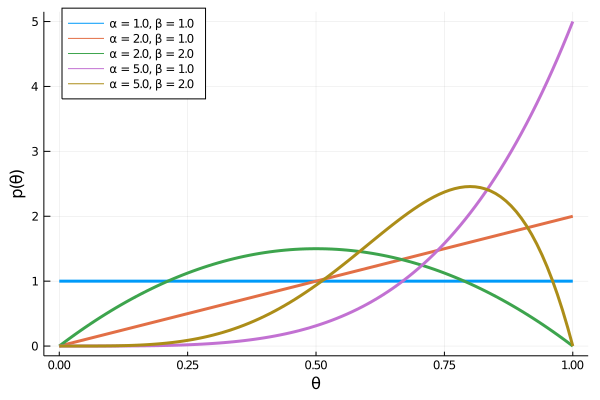

In [3]:
# Define shape parameters
α = [2.0, 5.0]
β = [1.0, 2.0]

# Define initial distribution
pθ = Beta(1.0, 1.0)

# Start initial plot
plot(θ, pdf.(pθ, θ), linewidth=3, label="α = 1.0, β = 1.0", xlabel="θ", ylabel="p(θ)", legend=:topleft)

# Loop over shape parameters
for a in α
    for b in β
        plot!(θ, pdf.(Beta(a, b), θ), linewidth=3, label="α = "*string(a)*", β = "*string(b))
    end
end
plot!()

Code notes:
- Square brackets around numbers automatically creates an Array (in Python, they create lists).
- The `:` in `:topleft` indicates a `Symbol` type. It has many uses, but here it is used synonymously with a string option (e.g. legend="topleft").
- `for` loops can be done by using a range, such as `for i = 1:10` (like in Matlab), or using a variable that iteratively takes a value in an array, such as `for i in [1,2.3]` (like in Python). More [here](https://www.tutorialkart.com/julia/julia-for-loop/).
- The `!` at the end of the plot command means the function is performed ["in-place"](https://docs.julialang.org/en/v1/manual/style-guide/#bang-convention-1). In other words, it changes its input arguments. Here, we change the plot by adding lines.
- The final `plot!` is there to ensure Jupyter actually plots the figure. If you end a cell on an `end` command, Jupyter will remain silent.

Note for the keen observers among you: since this is a continuous distribution, we are not actually plotting "probability", but rather ["probability density"](https://en.wikipedia.org/wiki/Probability_density_function#Link_between_discrete_and_continuous_distributions) (probability densities can be larger than $1$).

As you can see, the Beta distribution is quite flexible and can capture your belief about how often participants will correctly detect the alcoholic beverage. For example, the purple line indicates that you believe that it is very probable that participants will always get it right (peak lies on $\theta=1.0$), but you still think there is some probability that the participants will guess at random ($p(\theta = 1/2) \approx 0.3$). The yellow-brown line indicates you believe that it is nearly impossible that the participants will always get it right ($p(\theta = 1) \approx 0.0$), but you still believe that they will get it right most often (peak lies around $\theta \approx 0.8$).

### Summary

A prior distribution $p(\theta)$ reflects our beliefs about good values for parameter $\theta$ _before_ data is observed.

## **Assignment**: 

I want you to pick values for the shape parameters $\alpha$ and $\beta$ that reflect how often you think the participants will get it right.

## 2. Likelihood

The next step is the [likelihood function](https://en.wikipedia.org/wiki/Likelihood_function). A likelihood is a function of parameters given observed data. In our tasting experiment, we are using the Bernoulli distribution: the higher value $\theta$ has, the more probable the event $X=1$, i.e. the participant correctly guesses the alcoholic beverage. The formula for the Bernoulli distribution is:

$$\begin{align}
p(X = x \mid \theta) =&\ \text{Bernoulli}(X \mid \theta) \\
=&\ \theta^x (1-\theta)^{1-x}
\end{align}$$

If $X=1$, then the formula simplifies to $p(X = 1 \mid \theta) = \theta^1 (1-\theta)^{1-1} = \theta$ and if $X=0$, it simplifies to $p(X = 0 \mid \theta) = \theta^0 (1-\theta)^{1-0} = 1-\theta$. If you have multiple observations for $X$, you can get the probability of all observations by taking the product of individual probabilities:

$$p(\{x_1, \dots, x_N\} \mid \theta) = \prod_{i=1}^{N} p(X = x_i \mid \theta)$$

As an example, suppose the first two participants have correctly guessed the beverage and a third one incorrectly guessed it. Then, the probability under $\theta = 0.8$ is $$p(\{1,1,0\} \mid \theta = 0.8) = 0.8 \cdot 0.8 \cdot 0.2 = 0.128 \, .$$ 

That is larger than the probability under $\theta = 0.4$, which is $$p(\{1,1,0\} \mid \theta = 0.4) = 0.4 \cdot 0.4 \cdot 0.6 = 0.096 \, .$$ 

But it is not as large as the probability under $\theta = 0.6$, which is $$p(\{1,1,0\} \mid \theta = 0.6) = 0.6 \cdot 0.6 \cdot 0.4 = 0.144 \, .$$ 

As you can see, the likelihood function tells us how well each value of the parameter fits the observed data. In short, how "likely" each parameter value is. Now let's actually observe some data.

### Data

The data of the participants in Amsterdam is available online at the [Open Science Foundation](https://osf.io/428pb/?view_only=e3dc67dab9c54d23a92fb2e88465f428). We'll start by reading it in.

In [4]:
using DataFrames
using CSV

[CSV.jl](https://github.com/JuliaData/CSV.jl) is a library for reading in data stored in tables and [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl) manipulates table data.

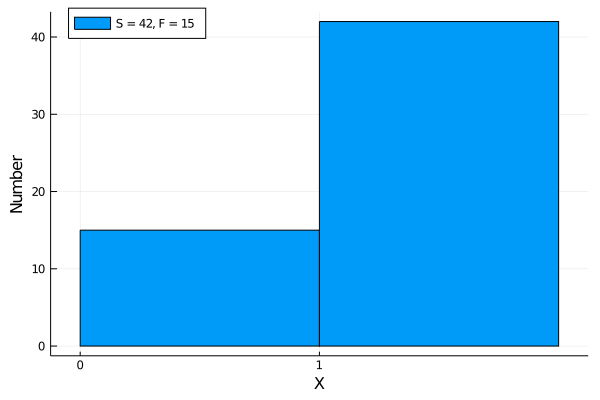

In [5]:
# Read data from CSV file
data = CSV.read("../datasets/TastingBeerResults.csv")

# Extract variable indicating correctness of guess
X = data[!, :CorrectIdentify]

# Number of successes and failures
S = sum(X .== 1)
F = sum(X .== 0)

# Visualize frequencies
histogram(X, bins=[0,1,2], label="S = "*string(S)*", F = "*string(F), xlabel="X", xticks=[0,1], ylabel="Number", legend=:topleft)

Code notes:
- The `!` in `data[!, ` is specific to the DataFrames syntax.
- The `.==` checks for each element of the array X whether it is equal.

Let's visualize the likelihood of these observations.

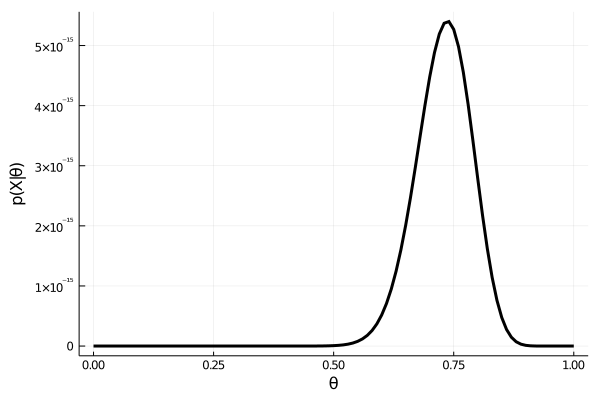

In [6]:
# Define the Bernoulli likelihood function
Bernoulli(S, F, θ) = θ^S * (1-θ)^F

# Plot likelihood
plot(θ, Bernoulli.(S, F, θ), linewidth=3, color="black", label="", xlabel="θ", ylabel="p(X|θ)")

The likelihood has somewhat of a bell shape, peaking just below $\theta = 0.75$. Note that the y-axis is very small. Indeed, the likelihood is not a proper probability distribution, because it doesn't integrate / sum to $1$.

## 3. Posterior

One we have specified the prior and the likelihood, we can compute the posterior. Remember Bayes' rule:

$$ p(\theta \mid X) = \frac{p(X \mid \theta) p(\theta)}{p(X)} \, .$$

The posterior $p(\theta \mid X)$ equals the likelihood $p(X \mid \theta)$ times the prior $p(\theta)$ divided by the evidence $p(X)$. In our tasting experiment, we have a special thing going on: [conjugacy](https://en.wikipedia.org/wiki/Conjugate_prior). The Beta distribution is "conjugate" to the Bernoulli likelihood, meaning that the posterior distribution is also going to be a Beta distribution. Specifically with the Beta-Bernoulli combination, it is easy to see what conjugacy actually means. We haven't looked at the formula for the Beta distribution yet, which is:

$$\begin{align} 
p(\theta) =&\ \text{Beta}(\theta \mid \alpha, \beta) \\
=&\ \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)}  \theta^{\alpha-1} (1-\theta)^{\beta-1} \, .
\end{align}$$

The term $\Gamma(\alpha + \beta) / \big( \Gamma(\alpha) \Gamma(\beta) \big)$ normalises this distribution. If you now take the product of the likelihood and the prior (ignoring the normalisation), you get something that can be simplified beautifully:

$$\begin{align} 
p(X \mid \theta) p(\theta) \ \propto&\ \ \theta^x (1-\theta)^{1-x} \cdot \theta^{\alpha-1} (1-\theta)^{\beta-1} \\
=&\ \ \theta^{x+\alpha-1} (1-\theta)^{1-x+\beta-1} \, . 
\end{align}$$

This last line is again the formula for the Beta distribution (except for a proper normalisation) but with different parameters ($x+\alpha$ instead of $\alpha$ and $x+\beta$ instead of $\beta$). This is what we mean by conjugacy: the product of the likelihood and the prior simplifies elegantly to produce a convenient form for the posterior.

Let's now visualise the posterior after observing the data from Amsterdam.

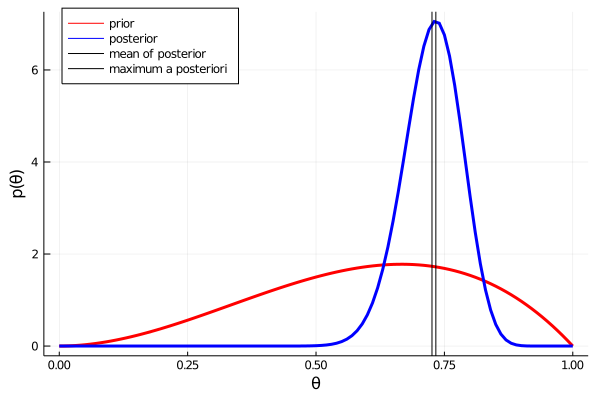

In [7]:
# Define shape parameters of prior distribution
α0 = 3.0
β0 = 2.0

# Define prior distribution
pθ = Beta(α0, β0)

# Update parameters for the posterior
αN = α0 + sum(X .== 1)
βN = β0 + sum(X .== 0)

# Define posterior distribution
pθX = Beta(αN, βN)

# Mean of posterior
mean_post = αN / (αN + βN)
mode_post = (αN - 1) / (αN + βN - 2)

# Visualize probability distribution function
plot(θ, pdf.(pθ, θ), linewidth=3, color="red", label="prior", xlabel="θ", ylabel="p(θ)")
plot!(θ, pdf.(pθX, θ), linewidth=3, color="blue", label="posterior")
vline!([mean_post], color="black", label="mean of posterior", legend=:topleft)
vline!([mode_post], color="black", label="maximum a posteriori", legend=:topleft)

Code notes:
- `vline` draw a vertical line in the plot, at the specified point on the x-axis.
- `mode()` extracts the [mode](https://en.wikipedia.org/wiki/Mode_(statistics)) of the supplied distribution, i.e. the point with the largest probability.

That looks great! We have updated our belief from a very broad prior to a much sharper posterior. 

The posterior contains a lot of information: it tells us something about every value for $\theta$. Sometimes, we are interested in a point estimate, i.e. the probability of a single value for $\theta$ under the posterior. Two well-known point estimators are the mean of the posterior and the mode (the value for $\theta$ with the highest probability). I have plotted both point estimates in the figure above. In this case, they are nearly equal. 

## **Assignment**: 

Plug the shape parameters of your prior into the code block above and see how your posterior differs (if you had a different prior than I had).

## Hypothesis testing

With our posterior distribution we can make quantitative statements about how well we think people can recognize alcoholic from non-alcoholic hefeweizen. But suppose you meet someone who is absolutely sure that people can't tell the difference. Can you say something about the probability of his belief, given the experiment?

This is a question about _relative probabilities_ ; the probability of an event relative to another event. We can answer this question by means of a statistical technique called _hypothesis testing_. In hypothesis testing, you start with a null hypothesis $\mathcal{H}_0$, which is a particular choice for the detection parameter $\theta$. In the question above, the other person's belief corresponds to $\theta = 0.5$. We then have an alternative hypothesis $\mathcal{H}_1$, namely that his belief is wrong, i.e. $\theta \neq 0.5$. From a Bayesian perspective, hypothesis testing is just another application of Bayes' rule:

$$\begin{align}
\underbrace{\frac{p(\mathcal{H}_1 | X)}{p(\mathcal{H}_0 | X)}}_{\text{Posterior belief over hypotheses}} = \underbrace{\frac{p(\mathcal{H}_1)}{p(\mathcal{H}_0)}}_{\text{Prior belief over hypotheses}} \cdot \underbrace{\frac{p(X | \mathcal{H}_1)}{p(X | \mathcal{H}_0)}}_{\text{Likelihood of hypotheses}}
\end{align}$$

Note that the evidence term $p(X)$ is missing. That's because it appears both in the numerator and denominator and therefore cancels out. With these relative probabilities, the change from prior to posterior depends solely on the likelihood of hypotheses. The ratio of likelihoods is called the _Bayes factor_. Bayes factors can be hard to compute, but in some cases we can simplify it: if the null hypothesis is a specific value of interest, for instance $\theta = 0.5$, and the alternative hypothesis is _not_ that specific value, e.g. $\theta \neq 0.5$, then the factor reduces to what's known as a Savage-Dickey Ratio (see Appendix A of [Wagemakers et al., 2010](https://www.sciencedirect.com/science/article/pii/S0010028509000826?casa_token=oOWuhv4FdwcAAAAA:HdpoBRU0adxKmCDPZF0gADbzbkPoiejfc0ZMJlTKq0DwhVVcnvM0OxS4IJV1GGKbSvb6yLCOvA)):

$$ \frac{p(X | \mathcal{H}_1)}{p(X | \mathcal{H}_0)} = \frac{p(\theta = 0.5)}{p(\theta = 0.5 \mid X)} \, .$$

This compares the probability of $\theta = 0.5$ under the prior versus $\theta = 0.5$ under the posterior. It effectively tells you how much your belief changes after observing the data. Let's compute the Savage-Dickey ratio for our experiment:

In [8]:
BF_10 = pdf(pθ, 0.5) / pdf(pθX, 0.5)

189.49827267274665

So, in the experiment, the alternative hypothesis _"people can correctly recognise alcoholic from non-alcoholic Hefeweissbier"_ is almost 200 times more probable than the null hypothesis that _"people cannot recognise alcoholic from non-alcoholic Hefeweissbier"_.